In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Para ver más decimales 
pd.set_option('display.precision', 10)
# Mostrar floats en formato fijo en lugar de notación científica
pd.set_option('display.float_format', '{:.10f}'.format)


# Función para calcular distancia en metros usando la fórmula de Haversine
def haversine(coord1, coord2):
    R = 6371000  # radio de la Tierra en metros
    lat1, lon1 = np.radians(coord1)
    lat2, lon2 = np.radians(coord2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# Función para calcular los gradientes hidráulicos
def calcular_gradientes(df):
    resultados = []
    for (idx1, row1), (idx2, row2) in combinations(df.iterrows(), 2):
        h1, h2 = row1['WL_datum'], row2['WL_datum']
        coord1 = (row1['Latitude'], row1['Longitude'])
        coord2 = (row2['Latitude'], row2['Longitude'])
        distancia = haversine(coord1, coord2)
        if distancia != 0:
            gradiente = abs(h1 - h2) / distancia
            resultados.append(gradiente)
    return resultados




Basado en el trabajo de KK- Mariana disponible en este [link](https://docs.google.com/spreadsheets/d/1Z1ie6PNUucmkX4Nt--JerSfcTwtaU0vyDKLzIr3ljwk/edit?pli=1&gid=383103034#gid=383103034)

In [ ]:
# Cargar los datos
df1 = pd.read_csv(r"C:\Users\Mariana\Documents\freshwater_lens\data\water_table\water_table_DM.csv")
df2 = pd.read_csv(r"C:\Users\Mariana\Documents\freshwater_lens\data\water_table\water_table_PPK.csv")

In [7]:
# Gradientes hidráulicos
gradientes_1 = calcular_gradientes(df1)
gradientes_2 = calcular_gradientes(df2)


C:\Users\Mariana\AppData\Local\Temp\ipykernel_22256\1688807308.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gradientes_1, gradientes_2], labels=["DEM", "PPK"], patch_artist=True)


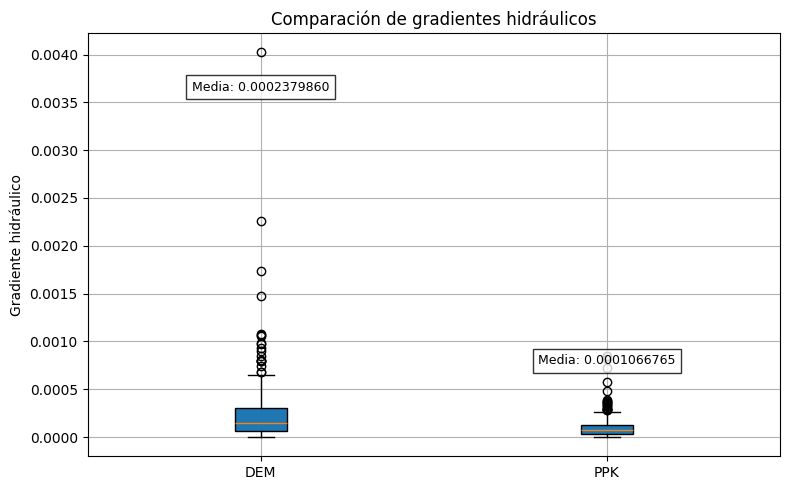

,Conjunto,Media,Mediana,Mínimo,Máximo,Desviación estándar,N pares de pozos
0,DEM,0.0002379860,0.0001452266,0.0000001828,0.0040260991,0.0003460446,300
1,PPK,0.0001066765,0.0000766619,0.0000000000,0.0008438946,0.0001207219,231


In [ ]:
# Estadísticas
stats = {
    'Conjunto': ['DEM', 'PPK'],
    'Media': [np.mean(gradientes_1), np.mean(gradientes_2)],
    'Mediana': [np.median(gradientes_1), np.median(gradientes_2)],
    'Mínimo': [np.min(gradientes_1), np.min(gradientes_2)],
    'Máximo': [np.max(gradientes_1), np.max(gradientes_2)],
    'Desviación estándar': [np.std(gradientes_1), np.std(gradientes_2)],
    'N pares de pozos': [len(gradientes_1), len(gradientes_2)]
}
stats_df = pd.DataFrame(stats)


# Boxplots
plt.figure(figsize=(8, 5))
plt.boxplot([gradientes_1, gradientes_2], labels=["DEM", "PPK"], patch_artist=True)
plt.title("Comparación de gradientes hidráulicos")
plt.ylabel("Gradiente hidráulico")
plt.grid(True)


plt.text(1, max(gradientes_1)*0.9, f"Media: {np.mean(gradientes_1):.10f}", ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))
plt.text(2, max(gradientes_2)*0.9, f"Media: {np.mean(gradientes_2):.10f}", ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


stats_df